In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

# Load MNIST
(X, _), _ = tf.keras.datasets.mnist.load_data()
X = (X.astype("float32") - 127.5) / 127.5
X = X.reshape(-1, 28*28)

# Generator
def build_gen():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(100,)),
        layers.Dense(784, activation="tanh")
    ])
    return model

# Discriminator
def build_disc():
    model = tf.keras.Sequential([
        layers.Dense(128, activation="relu", input_shape=(784,)),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

gen, disc = build_gen(), build_disc()
disc.compile(optimizer="adam", loss="binary_crossentropy")
z = layers.Input(shape=(100,))
img = gen(z)
disc.trainable = False
valid = disc(img)
gan = tf.keras.Model(z, valid)
gan.compile(optimizer="adam", loss="binary_crossentropy")

# Training loop
batch_size, epochs = 128, 10000
for epoch in range(epochs):
    idx = np.random.randint(0, X.shape[0], batch_size)
    real, noise = X[idx], np.random.normal(0, 1, (batch_size, 100))
    fake = gen.predict(noise, verbose=0)
    d_loss_real = disc.train_on_batch(real, np.ones((batch_size, 1)))
    d_loss_fake = disc.train_on_batch(fake, np.zeros((batch_size, 1)))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, D Loss: {0.5*(d_loss_real+d_loss_fake):.3f}, G Loss: {g_loss:.3f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0, D Loss: 0.702, G Loss: 0.783
Epoch 1000, D Loss: 5.705, G Loss: 0.002
Epoch 2000, D Loss: 6.080, G Loss: 0.001
Epoch 3000, D Loss: 6.349, G Loss: 0.001
Epoch 4000, D Loss: 6.566, G Loss: 0.000
Epoch 5000, D Loss: 6.755, G Loss: 0.000
Epoch 6000, D Loss: 6.924, G Loss: 0.000
Epoch 7000, D Loss: 7.080, G Loss: 0.000
Epoch 8000, D Loss: 7.227, G Loss: 0.000
Epoch 9000, D Loss: 7.367, G Loss: 0.000


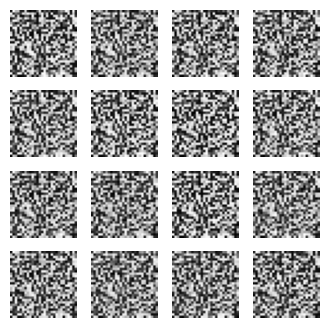

In [ ]:
import matplotlib.pyplot as plt

# Generate 16 fake images
noise = np.random.normal(0, 1, (16, 100))
gen_imgs = gen.predict(noise, verbose=0)
gen_imgs = gen_imgs.reshape(-1, 28, 28)

# Plot images
plt.figure(figsize=(4,4))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(gen_imgs[i], cmap="gray")
    plt.axis("off")
plt.show()
